#Python入門トレーニング

In [ ]:
# setup
# このブロックは演習の準備をするためのものですので、特に理解する必要はありません
import os
if not os.path.exists('Python_Learning'):
        !git clone https://github.com/Satyosh/Python_Learning.git
        os.chdir('Python_Learning')

! pip install summarytools

Cloning into 'Python_Learning'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 17 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (17/17), 1.48 MiB | 8.21 MiB/s, done.
Resolving deltas: 100% (2/2), done.


## 準備
まず、以下のコードを実行して、pandas, numpy, matplotlibを使えるようにします。
Pythonではライブラリというプログラム集を読み込んで、機能を追加できます。

*   Pandas …… 表形式のデータを取り扱うライブラリ
*   numpy …… 高速な計算用ライブラリ（行列計算など）
*   matplotlib …… グラフ描画用ライブラリ


In [ ]:
import pandas as pd   # pandasの読み込み
import numpy as np   # numpyの読み込み
from matplotlib import pyplot as plt # matplotlibの読み込み
%matplotlib inline

## ファイルの読み込み

### CSVファイルの読み込み

解析に使うファイルはcsv (comma separated values) という形式で管理することが多いです。

今回はmtcarsという1974年の自動車のカタログデータを使ってみます。 \
[mtcars :RDocumentation]('https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/mtcars')


In [ ]:
mtcars = pd.read_csv('./mtcars.csv')
mtcars.head(10)

,x,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


## データを眺めてみよう



### データを表示したいときは

データ分析の際には、まずデータの概観を掴むことが大切です。 \
データの中身を表示するのには、head関数やtail関数をよく使います。

In [ ]:
mtcars.head()

,x,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


#### 問. head関数でより多くの行を表示するにはどうすればよいでしょうか？

#### 問 tail関数の実行結果はどうなるでしょうか。
tail関数を使うときもhead関数と同様に mtcars.tail()と記述します。

### データが何行・何列あるか知りたいときは
データの行数、列数を表示するときは.shapeを使います \
(注意： shapeには（）は付けません）

In [ ]:
mtcars.shape

(32, 12)

mtcarsのデータは32行、12列のデータであることがわかりました。

 ## より詳しくデータを見る


### 基本統計量を求める

In [ ]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


ここで、meanは平均値、stdは標準偏差です。

#### 問. このデータセットで平均値のみを表示するにはどうすればいいでしょうか？

### データの一部だけを見る

['']で列名を指定すると、その行だけを抜き出すことができます。

In [ ]:
mtcars['mpg']

0     21.0
1     21.0
2     22.8
3     21.4
4     18.7
5     18.1
6     14.3
7     24.4
8     22.8
9     19.2
10    17.8
11    16.4
12    17.3
13    15.2
14    10.4
15    10.4
16    14.7
17    32.4
18    30.4
19    33.9
20    21.5
21    15.5
22    15.2
23    13.3
24    19.2
25    27.3
26    26.0
27    30.4
28    15.8
29    19.7
30    15.0
31    21.4
Name: mpg, dtype: float64

ここから、 平均値や最大値を求めることができます

In [ ]:
print("平均値:", mtcars['mpg'].mean())
print('標準偏差:', mtcars['mpg'].std())

平均値: 20.090625000000003
標準偏差: 6.026948052089104


2列以上の列を抜き出すことも可能ですが、書き方が少し変わります。

In [ ]:
mtcars[["mpg",'cyl', 'qsec']]   # []が２重になります

,mpg,cyl,qsec
0,21.0,6,16.46
1,21.0,6,17.02
2,22.8,4,18.61
3,21.4,6,19.44
4,18.7,8,17.02
5,18.1,6,20.22
6,14.3,8,15.84
7,24.4,4,20.00
8,22.8,4,22.90
9,19.2,6,18.30


#### 問. mtcarsからhp (horse power)の平均値を求めてください

146.6875

#### 問. mtcarsからwtとqsecを抜き出してください

### 条件による絞り込み

mpgが25以上のものだけを選んでみます

In [ ]:
mtcars[ mtcars['mpg'] >= 25]

,x,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
26,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2


この部分の解説：

*   mtcars['mpg'] …… mpgに注目する
*   mtcars['mpg'] >= 25 …… mpgのうち、値が10以上のものだけに注目
*   mtcars[ mtcars['mpg'] >= 25 ]  …… mtcarsのうち、mpgの値が10以上のものに注目


つぎにシリンダー数が４(cylが4)のものを、mpgについて昇順、降順でみてみましょう。

In [ ]:
mtcars[mtcars['cyl'] == 4 ].sort_values(by="mpg")

,x,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.60,1,1,4,2
20,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
26,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1


In [ ]:
mtcars[mtcars['cyl'] == 4 ].sort_values(by="mpg", ascending=False)

,x,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
26,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
20,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1


さらに、シリンダー数が４のときの、mpgの平均値を求めてみましょう。 \
まず、シリンダー数が４のときのmpgの列は以下のようになります。

In [ ]:
mtcars[mtcars['cyl']==4]['mpg']

2     22.8
7     24.4
8     22.8
17    32.4
18    30.4
19    33.9
20    21.5
25    27.3
26    26.0
27    30.4
31    21.4
Name: mpg, dtype: float64

あとはその平均を求めます

In [ ]:
mtcars[mtcars['cyl']==4]['mpg'].mean()

26.66363636363636

#### 問. dispが150以上の行を抜き出してください

#### 問. gearが5のときの排気量（disp)の平均値を求めてください

In [ ]:
mtcars[mtcars['gear']==5]['disp'].mean()

202.48

## グラフの表示

### 折れ線グラフ
折れ線グラフを書くときには、グラフを書きたいデータを選んでplot関数を使います

<Axes: >

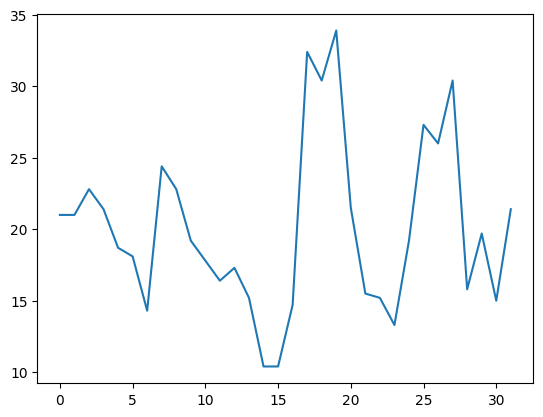

In [ ]:
mtcars['mpg'].plot()

グラフをもう少し大きくしたいので、figsizeのオプションを付けましょう

<Axes: >

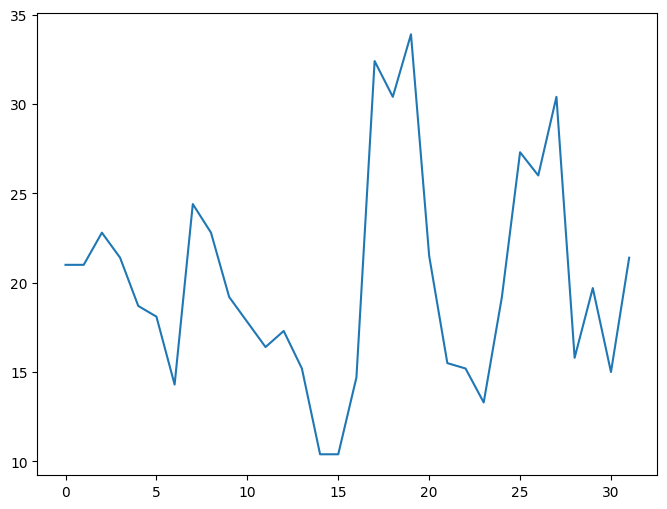

In [ ]:
mtcars['mpg'].plot(figsize=(8,6))

### グラフのタイトル、X軸、Y軸の名前
グラフにタイトルをつける場合には、plot関数のカッコ内にtitle='名前'を追加します。

<Axes: title={'center': 'Miles per galon'}>

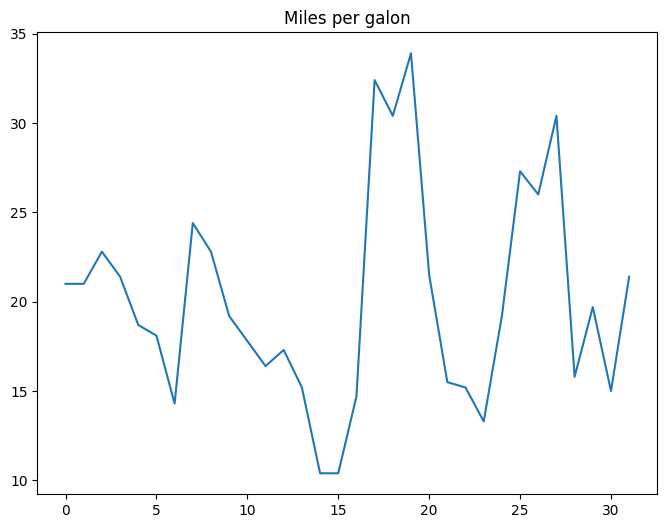

In [ ]:
mtcars['mpg'].plot(figsize=(8,6), title="Miles per galon")

mtcarsのdispの折れ線グラフをかいてください

<Axes: title={'center': 'test'}>

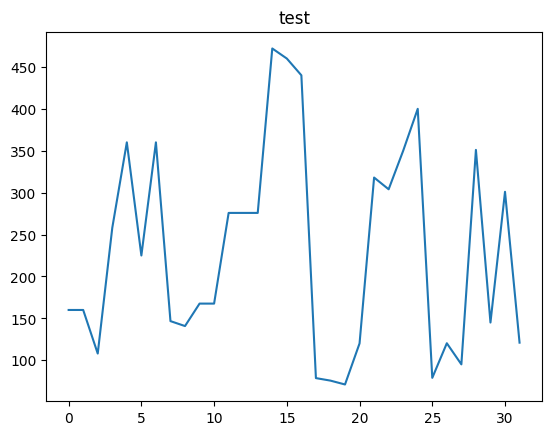

In [ ]:
mtcars['disp'].plot(title="test")

X軸、Y軸の名前をつけるのは少し複雑です。

*   plot関数の結果を別の変数にいれる
*   変数に対して, set_xlabel関数を実行する

という手順が必要です。



Text(0, 0.5, 'mpg')

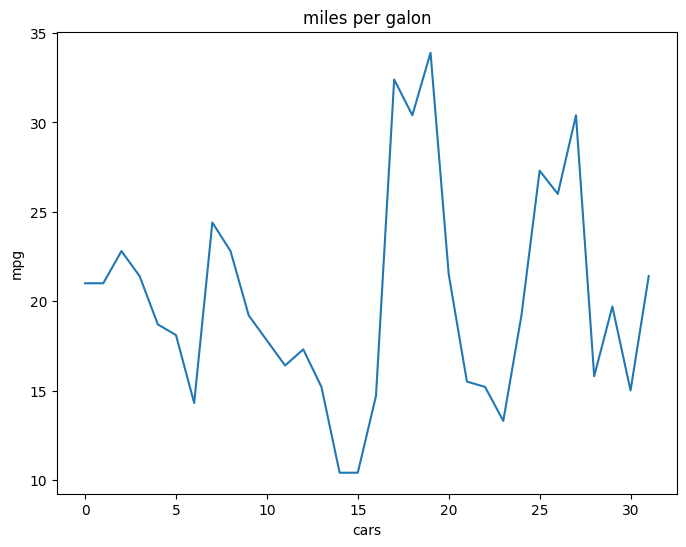

In [ ]:
ax = mtcars['mpg'].plot(figsize=(8,6), title="miles per galon")
ax.set_xlabel("cars")
ax.set_ylabel("mpg")

Temp_2020.csv というファイルを、Temp_2020という変数名で読み込んで、Sapporoのグラフを書いてみてください

<Axes: ylabel='Frequency'>

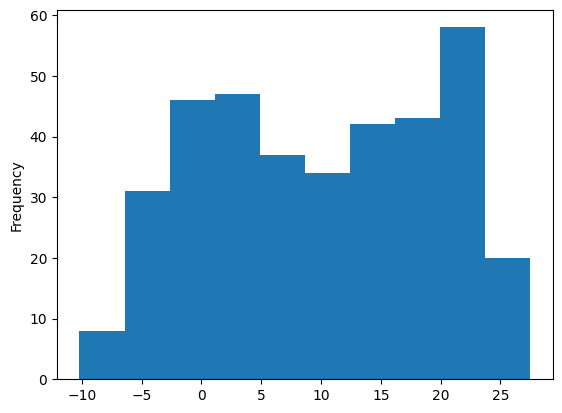

In [ ]:
Temp_2020 = pd.read_csv('Temp_2020.csv')
Temp_2020['Sapporo'].plot.hist()

<Axes: >

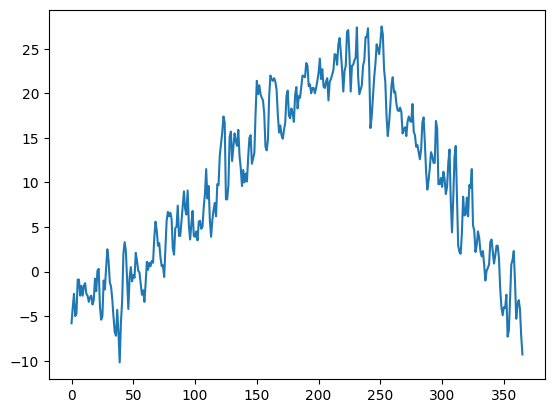

In [ ]:
Temp_2020['Sapporo'].plot()

#### 問. Temp_2020に対してplot関数を使った場合はどのようなグラフになりますか？
`Temp_2020.plot() `の実行結果を確認してください。

### ヒストグラム
ヒストグラムを描くときには、plot.hist関数を使います。

<Axes: ylabel='Frequency'>

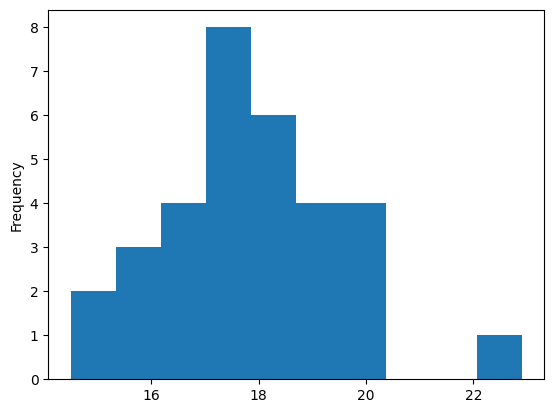

In [ ]:
mtcars['qsec'].plot.hist()

カッコのなかにgrid=Trueを追加することで、グリッド線を描くことができます。

<Axes: ylabel='Frequency'>

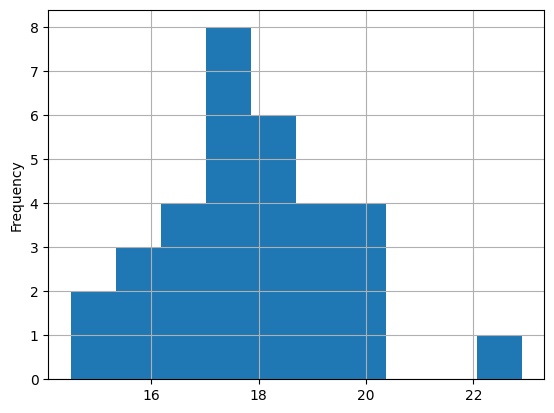

In [ ]:
mtcars['qsec'].plot.hist(grid=True)

ヒストグラム中に、平均値を表すグラフを追加します。 \
縦線を引くときは、plt.axvline関数を使います。




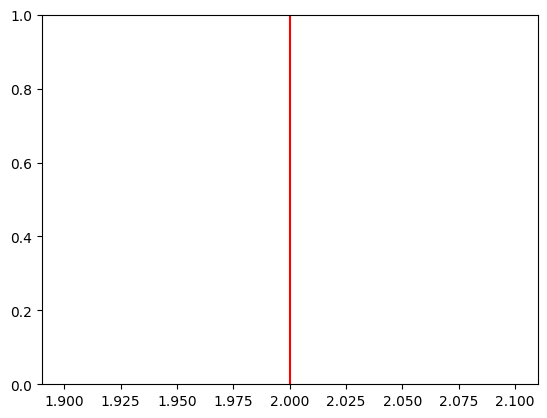

In [ ]:
plt.axvline(x=2,color="red")

<Axes: ylabel='Frequency'>

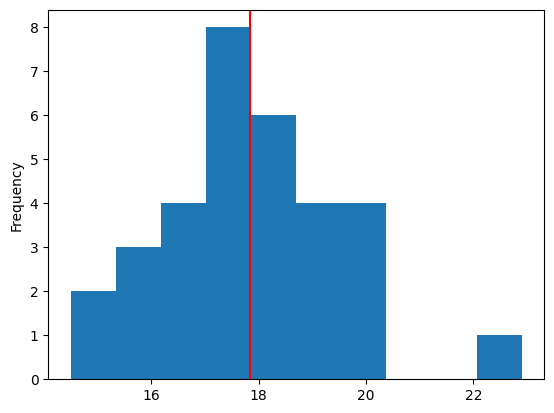

In [ ]:
plt.axvline(x=mtcars['qsec'].mean(), color="red")
mtcars['qsec'].plot.hist()

#### 問. Temp_2020より、Osakaのヒストグラムを作成してください

### 箱ひげ図
箱ひげ図を描く場合には、x軸（カテゴリーデータ）とy軸（数値データ）を選択した上で、boxplot(by='カテゴリーデータ')と書きます。 \
◯は外れ値を表します。

<Axes: title={'center': 'mpg'}, xlabel='[cyl]'>

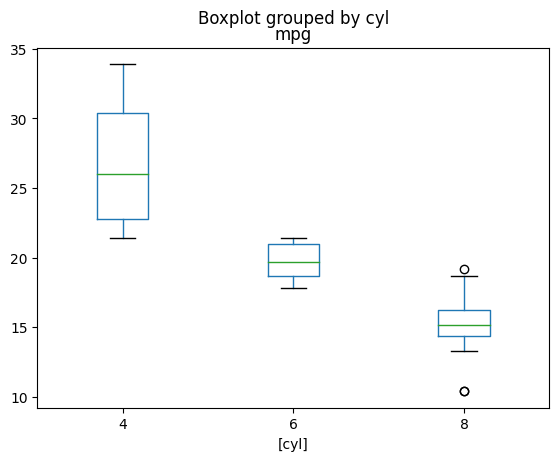

In [ ]:
mtcars[['cyl','mpg']].boxplot(by='cyl',grid=False)

### ファイルの書き出し
ファイルへ書き出す場合には、グラフを描く最後の行に
plt.savefig('ファイル名'）と書きます

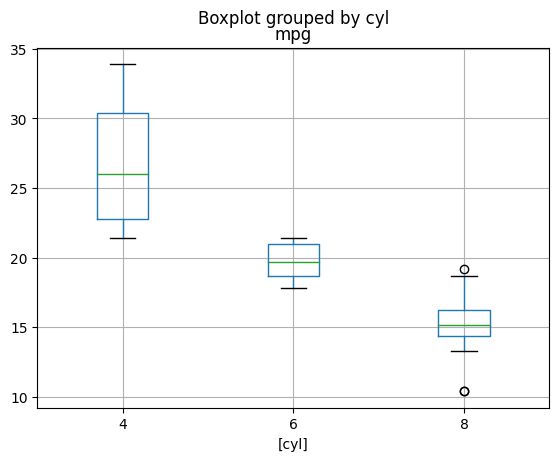

In [ ]:
mtcars[['cyl','mpg']].boxplot(by='cyl')
plt.savefig('example.png')

## 演習

#### 問. Temp_2020.csvを読み込み、基本統計量を求めてください。変数名はTemp_2020としてください。

## 補足情報

### Excelファイルの読み込み
もちろん、Excelのファイルを読み込むこともできます。 \
Excelの読み込みにはread_excel関数を使います

In [ ]:
df = pd.read_excel('./User_data.xlsx',index_col='ユーザーID',sheet_name='2月')
df.head(10)

,名前,年齢,性別,身長,体重
ユーザーID,,,,,
User001,John,63,M,191.62,64.61
User002,Tom,53,F,160.62,68.32
User003,Emily,39,M,159.09,72.80
User004,Sarah,32,M,159.17,89.26
User005,Michael,45,M,165.21,59.98
User006,Robert,63,F,176.24,75.71
User007,Jessica,43,M,171.60,79.62
User008,Laura,47,F,164.56,52.32
User009,David,35,M,180.59,80.38


### GroupByを用いた集計
たとえば、シリンダーの数ごとにグループ分けをして集計したい場合などは、groupby関数を用いて、グループを指定することができます

In [ ]:
mtcars.groupby('cyl').mean(numeric_only=True)

,mpg,disp,hp,drat,wt,qsec,vs,am,gear,carb
cyl,,,,,,,,,,
4,26.663636,105.136364,82.636364,4.070909,2.285727,19.137273,0.909091,0.727273,4.090909,1.545455
6,19.742857,183.314286,122.285714,3.585714,3.117143,17.977143,0.571429,0.428571,3.857143,3.428571
8,15.100000,353.100000,209.214286,3.229286,3.999214,16.772143,0.000000,0.142857,3.285714,3.500000


In [ ]:
mtcars.groupby('cyl').mean(numeric_only=True)['mpg']

cyl
4    26.663636
6    19.742857
8    15.100000
Name: mpg, dtype: float64

### データの概要をより見やすくする
より見やすくデータの概要を図示するために、summarytoolsというライブラリが便利です。


In [ ]:
! pip install summarytools
from summarytools.summarytools import dfSummary

dfSummary(mtcars)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,x[object],1. Mazda RX42. Mazda RX4 Wag3. Maserati Bora4. Ferrari Dino5. Ford Pantera L6. Lotus Europa7. Porsche 914-28. Fiat X1-99. Pontiac Firebird10. Camaro Z2811. other,1 (3.1%)1 (3.1%)1 (3.1%)1 (3.1%)1 (3.1%)1 (3.1%)1 (3.1%)1 (3.1%)1 (3.1%)1 (3.1%)22 (68.8%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADi0lEQVR4nO3cPWobUQBG0acgTNyMEAItxovIYrMI7UYITREbN0oRAiK2O3H1k3OqMNWALyNmeF8Wp9NpQOHbtW+A/4fYyIiNjNjIiI2M2MiIjYzYyIiNzGKM8TzGePrn+vvpdHq9wv3wwJabzebHNE3r84vzPB8Wi8VPwXFJy2ma1i8vL6+r1eptjDGOx+P33W633u/3T2MMsXExyzHGWK1Wb9vt9tfZ9ecr3Q8PzAsCGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRWY7x5wzb3wvn/4ZLWs7zfNjtdutxdoZtnufDGOP9erfFI7JBILPwX2ZR8WQjY11FxrqKjHUVGR91yYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeNYOBmDFzKebGQMXsgYvJAxeCHjoy4ZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9kHAsnY/BCxgsCGT+jZKyryFhXkbGuIuMFgYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYx1FRnrKjKOhZOxriLjyUbG4IWMwQsZgxcyPuqSERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxrFwMgYvZDzZyBi8kDF4IWPwQsZHXTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2NdRca6iowNAhnrKjKebGSsq8hYV5GxriLjoy4ZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9kHAsnY/BCxpONjMELGYMXMgYvZHzUJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2PwQsbghYxj4WQMXsh4QSDjZ5SMdRUZ6yoy1lVkvCCQERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRsa4iY11FxrFwMtZVZDzZyBi8kDF4IWPwQsZHXTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4Fk7G4IXMV082btNd/+J8OnjhNt37EOnD4IXb9AhDpK8GL9ymux4i+ahLRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRG5sPghdv0CH+jTwcv3KZ7HyI5Fn5f7vpYuMELGS8IZMRGRmxkxEZGbGTERkZsZMRGRmxkfgOZa07iIzEotwAAAABJRU5ErkJggg=="">",0(0.0%)
2,mpg[float64],Mean (sd) : 20.1 (6.0)min < med < max:10.4 < 19.2 < 33.9IQR (CV) : 7.4 (3.3),25 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACrElEQVR4nO3dsW7aUBiG4e9AiAyJjFDUZGPpWKkDYy6iF9tL6JAryNClUzYkhIjiBuEYurUdIoJ9fJrzVe+zH+zhFZL965fD4XAQkLvBe98AcIqz976BY0IIY0nnHY8PJO0jLr87HA7PEefRo2xDDSGMr66uvpRlOWt7tmmaUVVVHy8vL38MBoO6y/UfHx/XIYSvxJqHbEOVdF6W5ez29vZ5Op1u2xx8eHiY3d/ff1gsFt9vbm7WbS+82WyKu7u72Wq1OpdEqBnIOVRJ0nQ63V5fX/9sc2a9Xo8l6eLiovXZv4w7nkMCPEzBAqHCAqHCAqHCAqHCAqHCAqHCQvbvUd9L0zQjSWUIoctxxq89I9RXVFU1quv683w+Hw6Hw1ZTMYnxawqE+ordbndWFMVksVhs245gGb+mQahHRIxgGb/2jIcpWCBUWCBUWCBUWCBUWCBUWCBUWCBUWEj6wj9y3bnc7/ejPu8HvpKFGrPuLEl1XRdN03zabrffJHVd0MN/IuU/aud1Z+n3yvPk5eVlmOLm4CX5rL/LurP0Z+UZkHiYgglChQVChQVChQVChQVChQVChQV2phJg1bp/hNozVq3TINSesWqdBqEmwqp1v3iYggVChQVChQVChQVChQVChQVChYU336NGbJKyRWomcmtYivtQ8tHR8dFQYzZJ2SL1Ers1HPuh5LdGx2/9o8Z+OJctUh99bA13+lDyKaPjk0aoMR/OhZfYreFUo2MepmCBUGGBUGGBUGGBUGGBUGGBUGGBVZTMRG6wSt3HmFmPvAk1I7EbrDFjzNxH3oSakZgNVilujJn7yJtQM9R1DBkzxsx95M3DFCwQKiwQKiwQKiwQKiwQKiwQKiyc9B51s9kUbX/46empkKSqqorlcjn5l+ddr+1637HnT+nrFwi7jeFwv1NcAAAAAElFTkSuQmCC"">",0(0.0%)
3,cyl[int64],1. 82. 43. 6,14 (43.8%)11 (34.4%)7 (21.9%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABl0lEQVR4nO3bQWrjQBRF0a8gQmciYQxejBeRxWYR2o0J1qATMlEPMuwMk1dF5ZwNuGwuFhJ603EcBQkPrQ/A7zFV1VNVPbY+SEc+juN4a32IEc3n8/l5WZZT64P0Yt/312maXgT3/eZlWU7X6/VtXdf31odp7X6//9m27XS73R6rSmzfbK6qWtf1/XK5/G19mE48tT7AqNwgECM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNmrvp8j6v1QXrgd/hZ877vr9u2ncp7XFX1+aZuVX20PseIbBD+Z4PwQyZTPlJG/Wfz79ShIddVFlJ9Gm5dZSHVr1HXVe6sO+ShLjFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZihltXjfRdRjPkuspCqk82CMRYVxHjBoGYni6jLn2D62bKZ343vi6mfOZ3v0NPU75hHr3wNTcIxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IjpYsrX+vPJ6GbKZ343PhsEYkz5iPkHSryjSuhFD+UAAAAASUVORK5CYII="">",0(0.0%)
4,disp[float64],Mean (sd) : 230.7 (123.9)min < med < max:71.1 < 196.3 < 472.0IQR (CV) : 205.2 (1.9),

## 参考サイト
・[【データサイエンティスト入門編】探索的データ解析（EDA）の基礎操作をPythonを使ってやってみよう](https://www.codexa.net/basic-exploratory-data-analysis-with-python/)

・[東京大学「Pythonプログラミング入門」の授業ページ
](https://utokyo-ipp.github.io/course/)

・[京都大学プログラミング演習 python 2023](https://repository.kulib.kyoto-u.ac.jp/dspace/handle/2433/285599)


## 参考文献
・[「Pythonによるあたらしいデータ文責の教科書 第2版」, 翔泳社, 2022](https://www.shoeisha.co.jp/book/detail/9784798158341)


・[「Pythonデータサイエンスハンドブック　第2版」, オライリー・ジャパン, 2024](https://www.oreilly.co.jp/books/9784814400638/)


## 参考の参考
### バイオインフォマティクス
・[日本バイオインフォマティクス学会](https://www.jsbi.org/about/about-bi/)

### データサイエンス
・[R for Data Science](https://r4ds.had.co.nz/)